# SPAM E-mail Classification

### Packages for classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Import the dataset and explore the dataset

In [3]:
df=pd.read_csv('/kaggle/input/spam-email-detection-dataset/emails.csv')
df.head()

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5730, 110)

In [5]:
df.isna().sum()

text               0
spam               2
Unnamed: 2      5728
Unnamed: 3      5728
Unnamed: 4      5728
                ... 
Unnamed: 105    5728
Unnamed: 106    5728
Unnamed: 107    5729
Unnamed: 108    5729
Unnamed: 109    5729
Length: 110, dtype: int64

In [6]:
data=df[['text','spam']]
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
# Some Sample text
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [8]:
def show_email(index):
    print(data.loc[index])
    
show_email(0)

text    Subject: naturally irresistible your corporate...
spam                                                    1
Name: 0, dtype: object


<Axes: xlabel='count', ylabel='spam'>

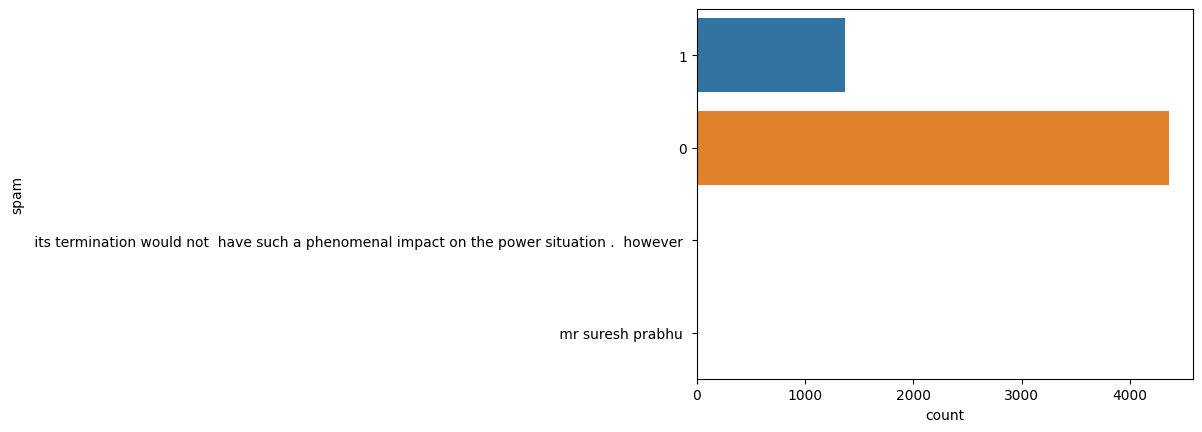

In [9]:
# Visualize the 
sns.countplot(data=data,y='spam')

There are two values in the spam column which arenot needed or there by mistake , so remove those values. 

In [10]:
data['spam'].value_counts()

spam
0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


In [12]:
filtered_data = (data['spam'] != '1') & (data['spam'] != '0')
filtered_data=data[~filtered_data]
filtered_data['spam'].value_counts()
data = filtered_data.copy()

In [13]:
# droping the duplicates and null values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [14]:
data.shape

(5693, 2)

As per the procedure encoding the target variable is next but as it is already encoded lets just continue.
Although the predited column is an object type. 

### Split the dataset

In [15]:
# First make the dataset split into predictor and predicted features
X=data['text']
y=data['spam']

In [16]:
# Split all the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=4)

In [17]:
print(' Shape of X_train : ',X_train.shape)
print(' Shape of y_train : ',y_train.shape)

print(' Shape of X_test : ',X_test.shape)
print(' Shape of y_test : ',y_test.shape)

 Shape of X_train :  (3985,)
 Shape of y_train :  (3985,)
 Shape of X_test :  (1708,)
 Shape of y_test :  (1708,)


### Use TfidfVectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(lowercase=True,stop_words='english')

In [19]:
X_train_vec=tfidf.fit_transform(X_train)
X_test_vec=tfidf.transform(X_test)

In [20]:
y_train.isna().sum()

0

### Model Creation and Prediction

In [21]:
log_reg=LogisticRegression()
log_reg.fit(X_train_vec,y_train)

LogisticRegression()

In [22]:
# Predictinng the test data
pred=log_reg.predict(X_test_vec)

### Evaluation of the prediction

In [23]:
accuracy_score(y_test,pred)

0.9806791569086651

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1300
           1       0.99      0.92      0.96       408

    accuracy                           0.98      1708
   macro avg       0.99      0.96      0.97      1708
weighted avg       0.98      0.98      0.98      1708



In [25]:
confusion_matrix(y_test,pred)

array([[1298,    2],
       [  31,  377]])

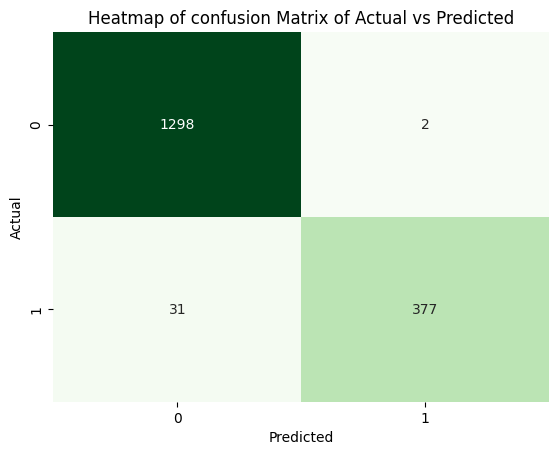

In [26]:
# Visualize the confusion matrix
sns.heatmap(data=confusion_matrix(y_test,pred),annot=True,fmt='d',cmap='Greens',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap of confusion Matrix of Actual vs Predicted')
plt.show()

## Here it's giving the accuracy score of 98.06% which is really good .
## If it has given any low value then other model should have been used.